## Install Lib

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install --upgrade --force-reinstall numpy catboost pandas scipy scikit-learn matplotlib seaborn

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

## Import Library

In [1]:
import os
import json
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.base import clone
from sklearn.model_selection import ParameterSampler

from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_val_score,
    GridSearchCV, RandomizedSearchCV, learning_curve
)

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, roc_auc_score, roc_curve, confusion_matrix,
    classification_report, f1_score, auc, precision_recall_curve, average_precision_score
)
import joblib
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from IPython.display import display, HTML

warnings.filterwarnings('ignore', category=UserWarning)

## Variable

In [2]:
project_path = "/content/drive/MyDrive/ComBio"
file_path = f"{project_path}/Dataset/cleaned_dataset.csv"
result_path = f"{project_path}/Result"
hyper_path = f"{project_path}/Hyperparameter"
model_path = f"{project_path}/Models"

## Load Dataset

In [3]:
df = pd.read_csv(file_path)
print(df.shape)
print(df.info())

(3687, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3687 non-null   int64  
 1   gender               3687 non-null   int64  
 2   race_ethnicity       3687 non-null   int64  
 3   education_level      3687 non-null   int64  
 4   income_ratio         3687 non-null   float64
 5   marital_status       3687 non-null   int64  
 6   jaundice_history     3687 non-null   int64  
 7   receive_transfusion  3687 non-null   int64  
 8   liver_condition      3687 non-null   int64  
 9   injectable_drug_use  3687 non-null   int64  
 10  drug_use             3687 non-null   int64  
 11  alcohol_consumption  3687 non-null   int64  
 12  alt                  3687 non-null   float64
 13  albumin              3687 non-null   float64
 14  alp                  3687 non-null   float64
 15  ast                  3687 n

In [4]:
df_train = df[df['dataset'] == 'train']
df_val = df[df['dataset'] == 'validation']
df_test = df[df['dataset'] == 'test']

X_train = df_train.drop(columns=['hcv_status', 'dataset'])
y_train = df_train['hcv_status']

X_val = df_val.drop(columns=['hcv_status', 'dataset'])
y_val = df_val['hcv_status']

X_test = df_test.drop(columns=['hcv_status', 'dataset'])
y_test = df_test['hcv_status']

print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (3198, 30)
Validation shape: (244, 30)
Test shape: (245, 30)


In [5]:
numeric_features_to_scale = ['age', 'income_ratio', 'alt', 'albumin', 'alp', 'ast', 'bun', 'cholesterol', 'cpk', 'creatinine', 'ggt', 'glucose', 'total_bilirubin', 'total_calcium', 'total_protein', 'triglycerides', 'uric_acid', 'ldh', 'globulin', 'osmolality']
categorical_features = ['gender', 'race_ethnicity', 'education_level', 'marital_status', 'jaundice_history', 'receive_transfusion', 'liver_condition', 'injectable_drug_use', 'drug_use', 'alcohol_consumption']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_to_scale)
    ],
    remainder='passthrough'
)

scaled_x_train = preprocessor.fit_transform(X_train)
scaled_x_val = preprocessor.transform(X_val)
scaled_x_test = preprocessor.transform(X_test)
os.makedirs(model_path, exist_ok=True)
joblib.dump(preprocessor, f"{model_path}/scaler.joblib")

['/content/drive/MyDrive/ComBio/Models/scaler.joblib']

# Training

## HyperParameter Tuning

In [6]:
hyper_file = f"{hyper_path}/parameter.json"
os.makedirs(hyper_path, exist_ok=True)

param_grids = {
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [8, 12],
        'min_samples_split': [20, 40],
        'min_samples_leaf': [10, 15],
        'max_features': ['sqrt', 0.7],
        'ccp_alpha': [0.001, 0.005]
    },
    "Decision Tree": {
        'max_depth': [5, 8, 10],
        'min_samples_split': [40, 60],
        'min_samples_leaf': [15, 20],
        'criterion': ['gini'],
        'ccp_alpha': [0.005, 0.01, 0.02]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.03, 0.05],
        'subsample': [0.7, 0.8],
        'colsample_bytree': [0.7, 0.8],
        'gamma': [0.5, 1, 2],
        'reg_alpha': [0.01, 0.1],
        'reg_lambda': [3, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'max_depth': [3, 4],
        'learning_rate': [0.01, 0.05],
        'subsample': [0.7, 0.8],
        'min_samples_split': [20, 40],
        'min_samples_leaf': [10, 15],
        'max_features': ['sqrt', 0.8]
    },
    "CatBoost": {
        'iterations': [100, 200, 300],
        'learning_rate': [0.03, 0.05],
        'depth': [4, 5, 6],
        'l2_leaf_reg': [10, 15, 20],
        'subsample': [0.7, 0.8],
        'colsample_bylevel': [0.7, 0.8],
        'border_count': [32, 64]
    }
}

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

def tune_model_with_cv(name, model, param_grid, X_train, y_train, metric='accuracy', n_iter=20, cv_folds=5):
    print(f"=== Hyperparameter Tuning {name} dengan {cv_folds}-Fold Cross Validation ===\n")

    if not param_grid:
        print(f"{name} dilatih dengan parameter default.")

        # Evaluasi dengan cross validation menggunakan parameter default
        if metric == 'accuracy':
            cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy')
        elif metric == 'f1':
            cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='f1_weighted')
        elif metric == 'auc':
            if len(np.unique(y_train)) > 2:  # multiclass
                cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='roc_auc_ovr_weighted')
            else:  # binary
                cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='roc_auc')

        mean_score = cv_scores.mean()
        std_score = cv_scores.std()

        print(f"CV {metric} untuk {name} dengan parameter default: {mean_score:.4f} (+/- {std_score*2:.4f})")

        # Fit model dengan seluruh training data
        model.fit(X_train, y_train)
        return model, model.get_params(), mean_score

    # RandomizedSearchCV untuk hyperparameter tuning
    print(f"Melakukan RandomizedSearchCV dengan {n_iter} iterasi dan {cv_folds}-fold CV...")

    # Tentukan scoring metric
    if metric == 'accuracy':
        scoring = 'accuracy'
    elif metric == 'f1':
        scoring = 'f1_weighted'
    elif metric == 'auc':
        if len(np.unique(y_train)) > 2:  # multiclass
            scoring = 'roc_auc_ovr_weighted'
        else:  # binary
            scoring = 'roc_auc'

    try:
        # Gunakan RandomizedSearchCV
        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grid,
            n_iter=n_iter,
            cv=cv_folds,
            scoring=scoring,
            random_state=42,
            n_jobs=-1,  # Gunakan semua core yang tersedia
            verbose=1
        )

        random_search.fit(X_train, y_train)

        best_score = random_search.best_score_
        best_params = random_search.best_params_
        best_model = random_search.best_estimator_

        print(f"\nBest CV {metric} for {name}: {best_score:.4f}")
        print("Parameter terbaik:", best_params)

        # Tampilkan CV results summary
        cv_results = random_search.cv_results_
        mean_scores = cv_results['mean_test_score']
        std_scores = cv_results['std_test_score']

        print(f"CV Score Statistics:")
        print(f"  Mean: {np.mean(mean_scores):.4f}")
        print(f"  Std:  {np.std(mean_scores):.4f}")
        print(f"  Min:  {np.min(mean_scores):.4f}")
        print(f"  Max:  {np.max(mean_scores):.4f}")

        return best_model, best_params, best_score

    except Exception as e:
        print(f"Error dalam RandomizedSearchCV untuk {name}: {str(e)}")
        print(f"Menggunakan parameter default...")

        # Fallback ke parameter default jika terjadi error
        model.fit(X_train, y_train)
        if metric == 'accuracy':
            cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy')
        elif metric == 'f1':
            cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='f1_weighted')
        elif metric == 'auc':
            if len(np.unique(y_train)) > 2:
                cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='roc_auc_ovr_weighted')
            else:
                cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='roc_auc')

        return model, model.get_params(), cv_scores.mean()

def clean_params_for_json(params):
    cleaned = {}
    for key, value in params.items():
        if isinstance(value, (int, float, str, bool, list, dict)) or value is None:
            cleaned[key] = value
        else:
            pass
    return cleaned

best_models = {}
metrics = {}

if os.path.exists(hyper_file):
    try:
        with open(hyper_file, "r") as f:
            best_models_params_loaded = json.load(f)
        print(f"Loaded best hyperparameters from {hyper_file}")

        for name in models:
            if name in best_models_params_loaded:
                print(f"Loading and fitting model: {name}")
                model_instance = models[name]
                valid_param_keys = model_instance.get_params().keys()
                params_to_set = {k: v for k, v in best_models_params_loaded[name].items() if k in valid_param_keys}

                try:
                    model_instance.set_params(**params_to_set)
                except ValueError as e:
                     print(f"Warning: Could not set some params for {name}: {e}")
                     print(f"Attempting with params: {params_to_set}")

                model_instance.fit(scaled_x_train, y_train)
                best_models[name] = model_instance

                # Evaluasi dengan cross validation
                cv_scores = cross_val_score(model_instance, scaled_x_train, y_train, cv=5, scoring='accuracy')
                cv_acc = cv_scores.mean()
                metrics[name] = {'cv_accuracy': cv_acc, 'cv_std': cv_scores.std()}
                print(f"  CV accuracy for {name}: {cv_acc:.4f} (+/- {cv_scores.std()*2:.4f})")
            else:
                print(f"Warning: No parameters found for {name} in {hyper_file}. Skipping loading, will train with defaults if needed later.")

        print("Finished loading and fitting models from parameters.")

    except json.JSONDecodeError:
        print(f"Error reading {hyper_file}. File might be corrupted. Starting tuning...")
        os.remove(hyper_file) # Hapus file yang rusak agar bisa dibuat ulang
    except Exception as e:
        print(f"An unexpected error occurred while loading parameters: {e}. Starting tuning...")

if not os.path.exists(hyper_file):
    print("\nStarting hyperparameter tuning process with cross validation...")
    best_models_params_to_save = {}
    metrics = {}

    for name in models:
        print(f"\nTuning {name}...")
        tuned_model, best_params, cv_score = tune_model_with_cv(
            name=name,
            model=models[name],
            param_grid=param_grids.get(name, {}),
            X_train=scaled_x_train,
            y_train=y_train,
            metric='accuracy',
            n_iter=20,
            cv_folds=5
        )

        best_models[name] = tuned_model
        best_models_params_to_save[name] = best_params

        # Hitung CV score dan standard deviation
        cv_scores = cross_val_score(tuned_model, scaled_x_train, y_train, cv=5, scoring='accuracy')
        metrics[name] = {
            'cv_accuracy': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'best_cv_score': cv_score
        }

    cleaned_best_models_params = {
        name: clean_params_for_json(params)
        for name, params in best_models_params_to_save.items()
    }

    try:
        with open(hyper_file, "w") as f:
            json.dump(cleaned_best_models_params, f, indent=4)
        print(f"\nBest hyperparameters saved to {hyper_file}")

        metrics_file = f"{hyper_path}/cv_metrics.json"
        with open(metrics_file, "w") as f:
            json.dump(metrics, f, indent=4)
        print(f"Cross validation metrics saved to {metrics_file}")
    except Exception as e:
        print(f"\nError saving hyperparameters to {hyper_file}: {e}")

    print("Finished tuning models.")

print("\nCross Validation Performance Summary:")
for name, metric_values in metrics.items():
    cv_acc = metric_values.get('cv_accuracy', 'N/A')
    cv_std = metric_values.get('cv_std', 0)
    if cv_acc != 'N/A':
        print(f"{name}: CV Accuracy = {cv_acc:.4f} (+/- {cv_std*2:.4f})")
    else:
        print(f"{name}: CV Accuracy = N/A")

print("\nSaving trained models to .pkl files...")
for name, model in best_models.items():
    model_filename = os.path.join(model_path, f"{name}.pkl")
    try:
        joblib.dump(model, model_filename)
        print(f"Model '{name}' saved successfully to {model_filename}")
    except Exception as e:
        print(f"Error saving model '{name}' to {model_filename}: {e}")
print("Finished saving models.")


Starting hyperparameter tuning process with cross validation...

Tuning Random Forest...
=== Hyperparameter Tuning Random Forest dengan 5-Fold Cross Validation ===

Melakukan RandomizedSearchCV dengan 20 iterasi dan 5-fold CV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best CV accuracy for Random Forest: 0.9544
Parameter terbaik: {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 12, 'ccp_alpha': 0.001}
CV Score Statistics:
  Mean: 0.9418
  Std:  0.0100
  Min:  0.9259
  Max:  0.9544

Tuning Decision Tree...
=== Hyperparameter Tuning Decision Tree dengan 5-Fold Cross Validation ===

Melakukan RandomizedSearchCV dengan 20 iterasi dan 5-fold CV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best CV accuracy for Decision Tree: 0.9175
Parameter terbaik: {'min_samples_split': 40, 'min_samples_leaf': 15, 'max_depth': 10, 'criterion': 'gini', 'ccp_alpha': 0.005}
CV Score Statistics:
  Mean: 0.900

## ModelEvaluator Class

In [7]:
class ModelEvaluator:
    def __init__(self, project_path, scaling_data, best_models, y_data):
        self.project_path = project_path
        self.scaled_x_train, self.scaled_x_val, self.scaled_x_test = scaling_data
        self.best_models = best_models
        self.y_train, self.y_val, self.y_test = y_data
        self.roc_data = {}
        self.pr_data = {}

    def evaluate(self, model_name):
        model = self.best_models.get(model_name)
        if model is None:
            print(f"❌ Model {model_name} tidak ditemukan!")
            return

        result_save = f"{result_path}/{model_name}/"
        os.makedirs(result_save, exist_ok=True)

        y_pred_val = model.predict(self.scaled_x_val)
        acc_val = model.score(self.scaled_x_val, self.y_val)

        report_val = classification_report(self.y_val, y_pred_val, output_dict=True)
        f1_val = report_val["weighted avg"]["f1-score"]

        cm_val = confusion_matrix(self.y_val, y_pred_val)

        y_pred_test = model.predict(self.scaled_x_test)
        acc_test = model.score(self.scaled_x_test, self.y_test)

        report_test = classification_report(self.y_test, y_pred_test, output_dict=True)
        f1_test = report_test["weighted avg"]["f1-score"]

        cm_test = confusion_matrix(self.y_test, y_pred_test)

        if hasattr(model, "predict_proba"):
            y_proba_val = model.predict_proba(self.scaled_x_val)[:, 1]
            y_proba_test = model.predict_proba(self.scaled_x_test)[:, 1]

            fpr_val, tpr_val, _ = roc_curve(self.y_val, y_proba_val)
            auc_val = auc(fpr_val, tpr_val)

            fpr_test, tpr_test, _ = roc_curve(self.y_test, y_proba_test)
            auc_test = auc(fpr_test, tpr_test)

            self.roc_data[model_name] = {
                "fpr_test": fpr_test,
                "tpr_test": tpr_test,
                "auc_test": auc_test,
                "fpr_val": fpr_val,
                "tpr_val": tpr_val,
                "auc_val": auc_val
            }

            precision_val, recall_val, _ = precision_recall_curve(self.y_val, y_proba_val)
            ap_val = average_precision_score(self.y_val, y_proba_val)

            precision_test, recall_test, _ = precision_recall_curve(self.y_test, y_proba_test)
            ap_test = average_precision_score(self.y_test, y_proba_test)

            self.pr_data[model_name] = {
                "precision_val": precision_val,
                "recall_val": recall_val,
                "ap_val": ap_val,
                "precision_test": precision_test,
                "recall_test": recall_test,
                "ap_test": ap_test
            }
        else:
            auc_val, auc_test = None, None
            ap_val, ap_test = None, None

        print("\n=== Training Set ===")
        print("\n📊 Training Evaluation Results :")
        train_final, val_final, _ = self._plot_learning_curve(model, model_name, result_save)

        evaluation_results = {
            "Accuracy (Training)": round(train_final, 3),
            "Accuracy (Validation)": round(acc_val, 3),
            "F1-Score (Validation)": round(f1_val, 3),
            "Accuracy (Test)": round(acc_test, 3),
            "F1-Score (Test)": round(f1_test, 3),
            "AUC (Validation)": round(auc_val, 3) if auc_val is not None else "N/A",
            "AUC (Test)": round(auc_test, 3) if auc_test is not None else "N/A",
            "AP (Validation)": round(ap_val, 3) if ap_val is not None else "N/A",
            "AP (Test)": round(ap_test, 3) if ap_test is not None else "N/A",
        }

        with open(os.path.join(result_save, f"{model_name}_evaluation.json"), "w") as json_file:
            json.dump(evaluation_results, json_file, indent=4)


        print("\n=== Validation Set ===")
        print("\n📊 Validation Evaluation Results :")
        print(f"Accuracy (Validation): {round(acc_val, 3)}")
        print(f"F1-Score (Validation): {round(f1_val, 3)}")
        print(f"AUC (Validation): {round(auc_val, 3) if auc_val is not None else 'N/A'}")
        print(f"AP (Validation): {round(ap_val, 3) if ap_val is not None else 'N/A'}")

        print("\n📄 Classification Report (Validation):")
        print(classification_report(self.y_val, y_pred_val))

        self._save_and_show_confusion_matrix(cm_val, result_save, f"{model_name}_Confusion_Matrix_Validation.png", f"Confusion Matrix - {model_name} (Validation)")

        if auc_val is not None:
            self._plot_roc_curve(fpr_val, tpr_val, auc_val, result_save, f"{model_name}_ROC_Curve_Validation.png", f"ROC Curve - {model_name} (Validation)")

        if ap_val is not None:
            self._plot_pr_curve(precision_val, recall_val, ap_val, result_save, f"{model_name}_PR_Curve_Validation.png", f"Precision-Recall Curve - {model_name} (Validation)")

        print("\n=== Test Set ===")
        print("\n📊 Test Evaluation Results :")
        print(f"Accuracy (Test): {round(acc_test, 3)}")
        print(f"F1-Score (Test): {round(f1_test, 3)}")
        print(f"AUC (Test): {round(auc_test, 3) if auc_test is not None else 'N/A'}")
        print(f"AP (Test): {round(ap_test, 3) if ap_test is not None else 'N/A'}")

        print("\n📄 Classification Report (Test):")
        print(classification_report(self.y_test, y_pred_test))

        self._save_and_show_confusion_matrix(cm_test, result_save, f"{model_name}_Confusion_Matrix_Test.png", f"Confusion Matrix - {model_name} (Test)")

        if auc_test is not None:
            self._plot_roc_curve(fpr_test, tpr_test, auc_test, result_save, f"{model_name}_ROC_Curve_Test.png", f"ROC Curve - {model_name} (Test)")

        if ap_test is not None:
            self._plot_pr_curve(precision_test, recall_test, ap_test, result_save, f"{model_name}_PR_Curve_Test.png", f"Precision-Recall Curve - {model_name} (Test)")

        print(f"\n✅ Hasil evaluasi {model_name} disimpan di {result_save}")

    def _save_and_show_confusion_matrix(self, cm, path, filename, title):
        os.makedirs(path, exist_ok=True)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
        plt.title(title)
        plt.tight_layout()
        plt.savefig(os.path.join(path, filename), dpi=300)
        plt.show()
        plt.close()

    def _plot_roc_curve(self, fpr, tpr, auc_score, path, filename, title):
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})', color='blue')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title)
        plt.legend(loc="lower right")
        plt.savefig(os.path.join(path, filename), dpi=300)
        plt.show()
        plt.close()

    def _plot_pr_curve(self, precision, recall, ap_score, path, filename, title):
        plt.figure(figsize=(6, 5))
        plt.plot(recall, precision, label=f'PR Curve (AP = {ap_score:.3f})', color='green')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(title)
        plt.legend(loc="upper right")
        plt.grid(True)
        plt.savefig(os.path.join(path, filename), dpi=300)
        plt.show()
        plt.close()

    def plot_roc_side_by_side(self):
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        for model_name, data in self.roc_data.items():
            fpr_val, tpr_val, auc_val = data["fpr_val"], data["tpr_val"], data["auc_val"]
            axes[0].plot(fpr_val, tpr_val, label=f"{model_name} (AUC={auc_val:.3f})")

            fpr_test, tpr_test, auc_test = data["fpr_test"], data["tpr_test"], data["auc_test"]
            axes[1].plot(fpr_test, tpr_test, label=f"{model_name} (AUC={auc_test:.3f})")

        axes[0].plot([0, 1], [0, 1], "k--")
        axes[0].set_title("ROC Curve - Validation Set")
        axes[0].set_xlabel("False Positive Rate")
        axes[0].set_ylabel("True Positive Rate")
        axes[0].legend(loc="lower right")
        axes[0].grid(True)

        axes[1].plot([0, 1], [0, 1], "k--")
        axes[1].set_title("ROC Curve - Test Set")
        axes[1].set_xlabel("False Positive Rate")
        axes[1].set_ylabel("True Positive Rate")
        axes[1].legend(loc="lower right")
        axes[1].grid(True)

        plt.tight_layout()
        plt.savefig(os.path.join(result_path, "ROC_Curves_Comparison.png"), dpi=300)
        plt.show()
        plt.close()

    def plot_pr_side_by_side(self):
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        for model_name, data in self.pr_data.items():
            recall_val, precision_val, ap_val = data["recall_val"], data["precision_val"], data["ap_val"]
            axes[0].plot(recall_val, precision_val, label=f"{model_name} (AP={ap_val:.3f})")

            recall_test, precision_test, ap_test = data["recall_test"], data["precision_test"], data["ap_test"]
            axes[1].plot(recall_test, precision_test, label=f"{model_name} (AP={ap_test:.3f})")

        axes[0].set_title("Precision-Recall Curve - Validation Set")
        axes[0].set_xlabel("Recall")
        axes[0].set_ylabel("Precision")
        axes[0].legend(loc="lower left")
        axes[0].grid(True)

        axes[1].set_title("Precision-Recall Curve - Test Set")
        axes[1].set_xlabel("Recall")
        axes[1].set_ylabel("Precision")
        axes[1].legend(loc="lower left")
        axes[1].grid(True)

        plt.tight_layout()
        plt.savefig(os.path.join(result_path, "PR_Curves_Comparison.png"), dpi=300)
        plt.show()
        plt.close()

    def _plot_learning_curve(self, model, model_name, path):
        train_sizes = np.linspace(0.1, 1.0, 10)

        train_scores = []
        val_scores = []

        for size in train_sizes:
            n_samples = int(size * len(self.scaled_x_train))
            model_clone = clone(model)
            model_clone.fit(self.scaled_x_train[:n_samples], self.y_train[:n_samples])
            train_score = accuracy_score(self.y_train[:n_samples],
                                          model_clone.predict(self.scaled_x_train[:n_samples]))
            val_score = accuracy_score(self.y_val, model_clone.predict(self.scaled_x_val))

            train_scores.append(train_score)
            val_scores.append(val_score)

        train_scores = np.array(train_scores)
        val_scores = np.array(val_scores)

        train_mean = train_scores
        val_mean = val_scores

        plt.figure(figsize=(6, 5))
        plt.title(f"Learning Curve - {model_name}")
        plt.xlabel("Training Examples")
        plt.ylabel("Accuracy Score")
        plt.grid()

        plt.plot(train_sizes * len(self.scaled_x_train), train_mean, 'o-', color='r', label='Training Score')

        plt.plot(train_sizes * len(self.scaled_x_train), val_mean, 'o-', color='g', label='Validation Score')

        plt.legend(loc='best')
        train_final = train_mean[-1]
        val_final = val_mean[-1]
        gap = train_final - val_final

        if gap > 0.1:
            fit_status = "Possible Overfitting"
            plt.annotate(f"{fit_status} (gap: {gap:.3f})", xy=(0.7, 0.03), xycoords='axes fraction', bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))
        elif val_final < 0.6:
            fit_status = "Possible Underfitting"
            plt.annotate(f"{fit_status} (val score: {val_final:.3f})", xy=(0.7, 0.03), xycoords='axes fraction', bbox=dict(boxstyle="round,pad=0.3", fc="orange", alpha=0.3))
        else:
            fit_status = "Good Fit"
            plt.annotate(f"{fit_status}", xy=(0.7, 0.03), xycoords='axes fraction', bbox=dict(boxstyle="round,pad=0.3", fc="green", alpha=0.3))

        plt.plot(len(self.scaled_x_train), train_final, 'ro', markersize=10)
        plt.plot(len(self.scaled_x_train), val_final, 'go', markersize=10)

        plt.tight_layout()

        filename = f"{model_name}_Learning_Curve.png"
        plt.savefig(os.path.join(path, filename), dpi=300)
        plt.show()
        plt.close()

        print(f"  - Final Training Score: {train_final:.3f}")
        print(f"  - Final Validation Score: {val_final:.3f}")
        print(f"  - Gap Training and Validation: {gap:.3f}")
        print(f"  - Model Assessment: {fit_status}")

        return train_final, val_final, filename

evaluator = ModelEvaluator(
    project_path=project_path,
    scaling_data=(scaled_x_train, scaled_x_val, scaled_x_test),
    best_models=best_models,
    y_data=(y_train, y_val, y_test),
)

## Random Forest


=== Training Set ===

📊 Training Evaluation Results :


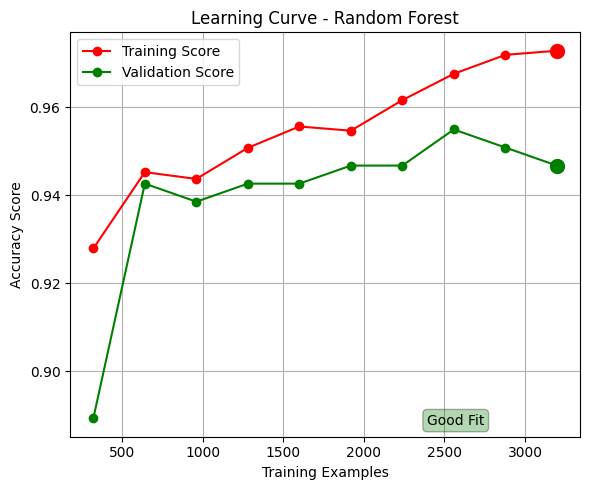

  - Final Training Score: 0.973
  - Final Validation Score: 0.947
  - Gap Training and Validation: 0.026
  - Model Assessment: Good Fit

=== Validation Set ===

📊 Validation Evaluation Results :
Accuracy (Validation): 0.947
F1-Score (Validation): 0.947
AUC (Validation): 0.991
AP (Validation): 0.963

📄 Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       200
           1       0.84      0.86      0.85        44

    accuracy                           0.95       244
   macro avg       0.91      0.91      0.91       244
weighted avg       0.95      0.95      0.95       244



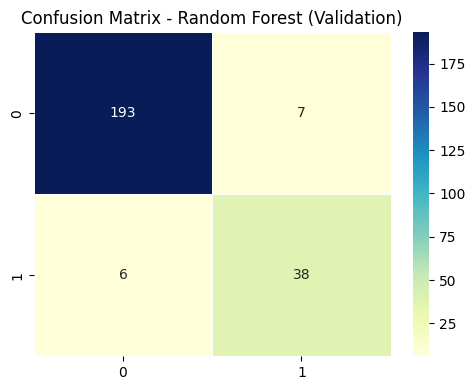

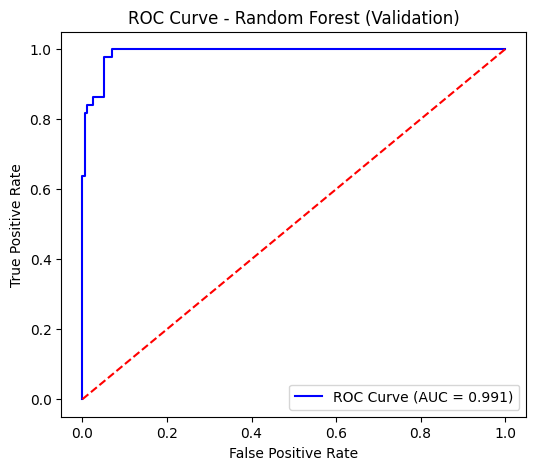

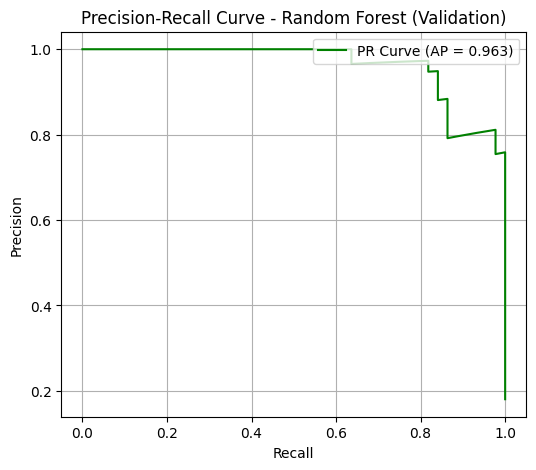


=== Test Set ===

📊 Test Evaluation Results :
Accuracy (Test): 0.943
F1-Score (Test): 0.944
AUC (Test): 0.981
AP (Test): 0.908

📄 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       201
           1       0.80      0.91      0.85        44

    accuracy                           0.94       245
   macro avg       0.89      0.93      0.91       245
weighted avg       0.95      0.94      0.94       245



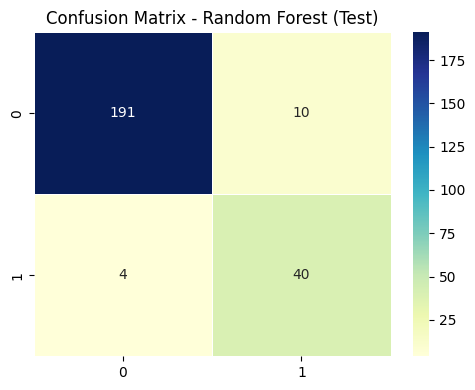

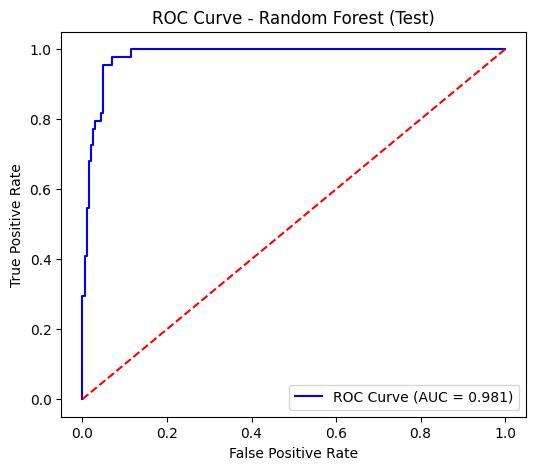

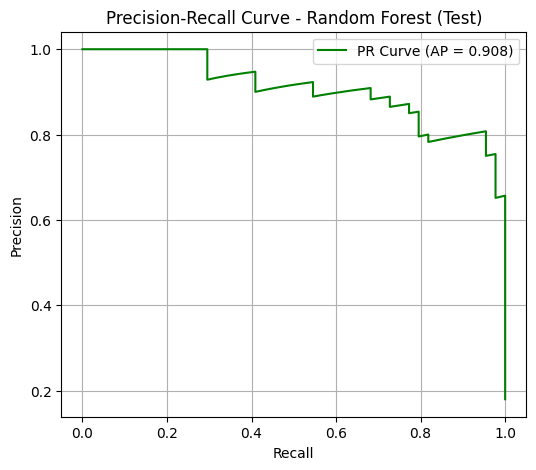


✅ Hasil evaluasi Random Forest disimpan di /content/drive/MyDrive/ComBio/Result/Random Forest/


In [8]:
evaluator.evaluate("Random Forest")

## Decision Tree


=== Training Set ===

📊 Training Evaluation Results :


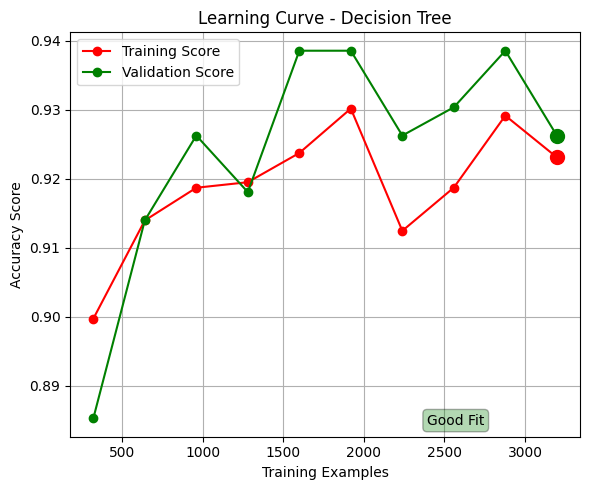

  - Final Training Score: 0.923
  - Final Validation Score: 0.926
  - Gap Training and Validation: -0.003
  - Model Assessment: Good Fit

=== Validation Set ===

📊 Validation Evaluation Results :
Accuracy (Validation): 0.926
F1-Score (Validation): 0.927
AUC (Validation): 0.964
AP (Validation): 0.797

📄 Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       200
           1       0.78      0.82      0.80        44

    accuracy                           0.93       244
   macro avg       0.87      0.88      0.88       244
weighted avg       0.93      0.93      0.93       244



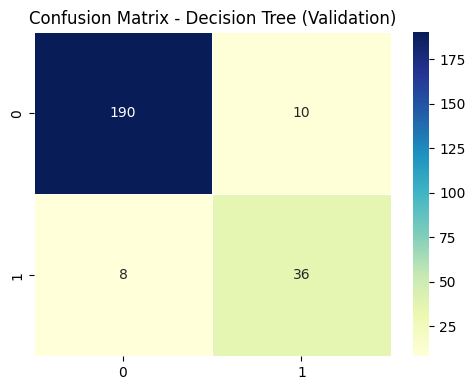

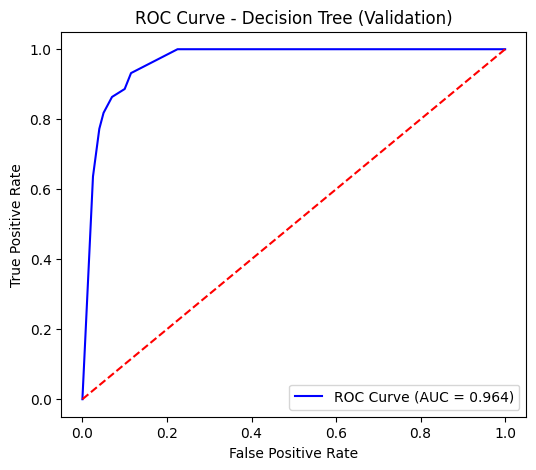

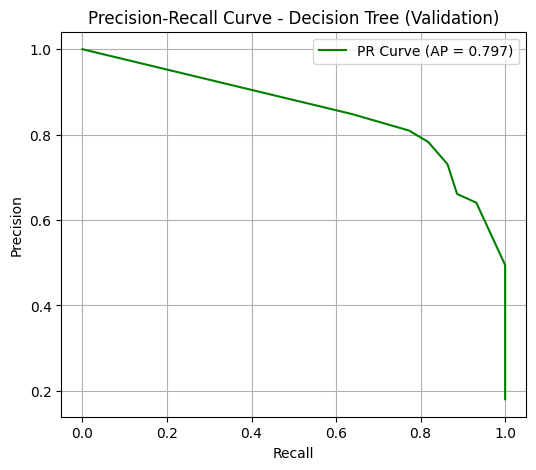


=== Test Set ===

📊 Test Evaluation Results :
Accuracy (Test): 0.906
F1-Score (Test): 0.909
AUC (Test): 0.922
AP (Test): 0.709

📄 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       201
           1       0.70      0.84      0.76        44

    accuracy                           0.91       245
   macro avg       0.83      0.88      0.85       245
weighted avg       0.92      0.91      0.91       245



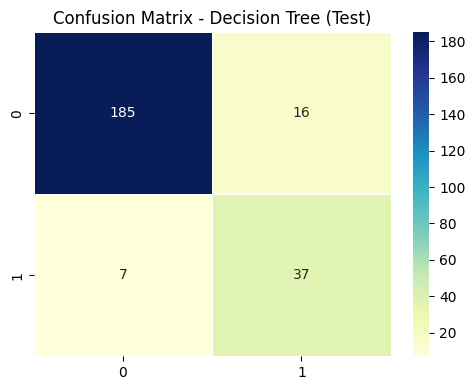

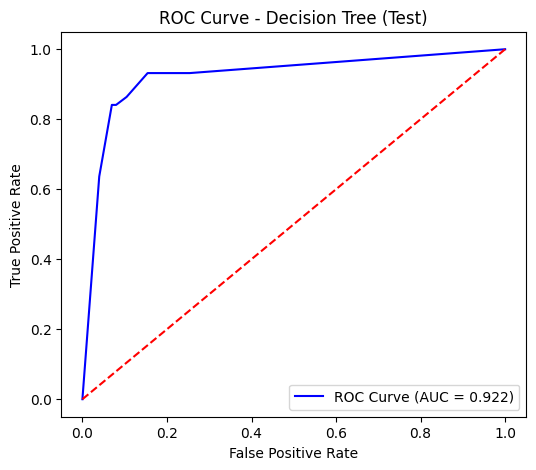

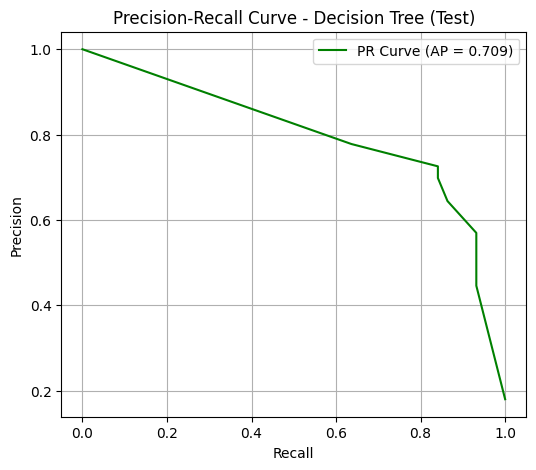


✅ Hasil evaluasi Decision Tree disimpan di /content/drive/MyDrive/ComBio/Result/Decision Tree/


In [9]:
evaluator.evaluate("Decision Tree")

## XGBoost


=== Training Set ===

📊 Training Evaluation Results :


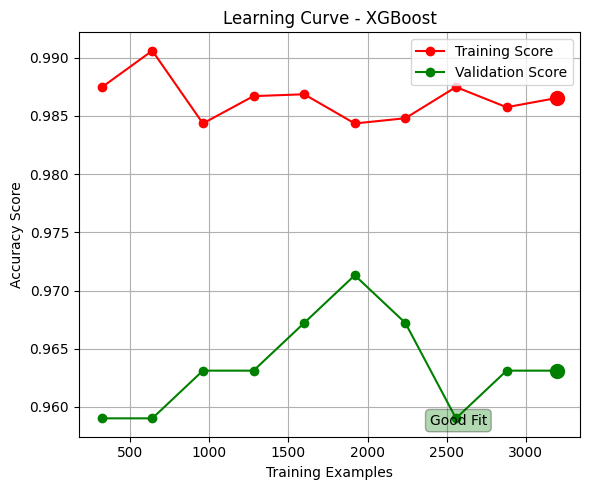

  - Final Training Score: 0.987
  - Final Validation Score: 0.963
  - Gap Training and Validation: 0.023
  - Model Assessment: Good Fit

=== Validation Set ===

📊 Validation Evaluation Results :
Accuracy (Validation): 0.963
F1-Score (Validation): 0.963
AUC (Validation): 0.994
AP (Validation): 0.972

📄 Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       200
           1       0.91      0.89      0.90        44

    accuracy                           0.96       244
   macro avg       0.94      0.93      0.94       244
weighted avg       0.96      0.96      0.96       244



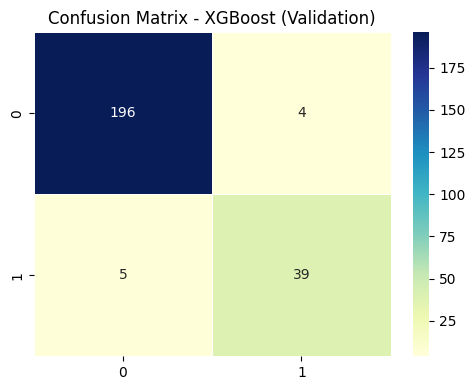

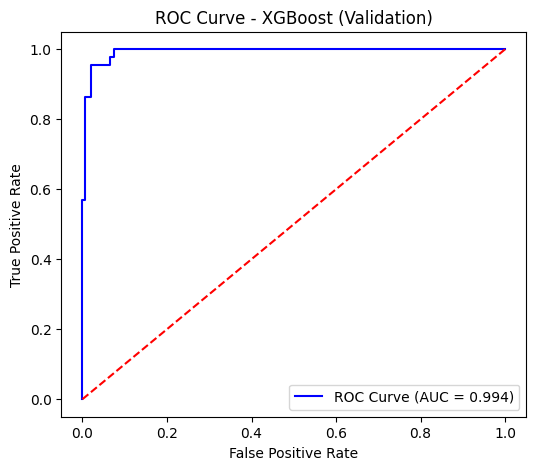

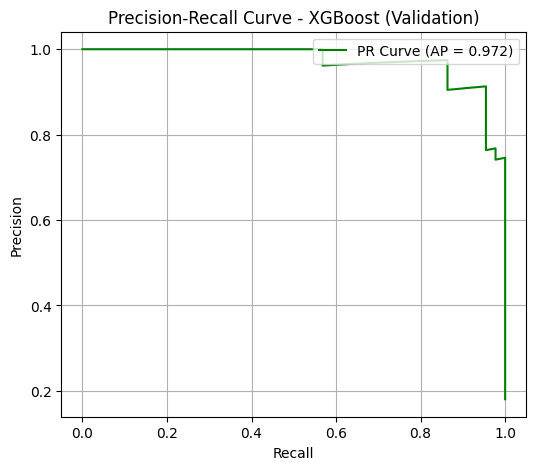


=== Test Set ===

📊 Test Evaluation Results :
Accuracy (Test): 0.943
F1-Score (Test): 0.945
AUC (Test): 0.987
AP (Test): 0.939

📄 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       201
           1       0.78      0.95      0.86        44

    accuracy                           0.94       245
   macro avg       0.88      0.95      0.91       245
weighted avg       0.95      0.94      0.95       245



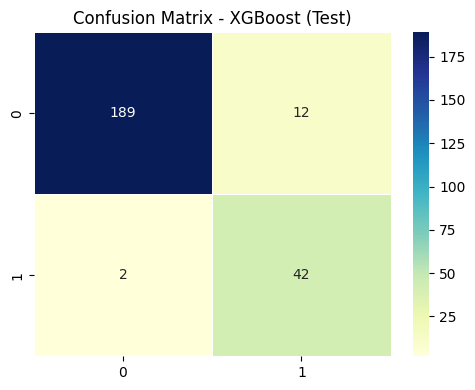

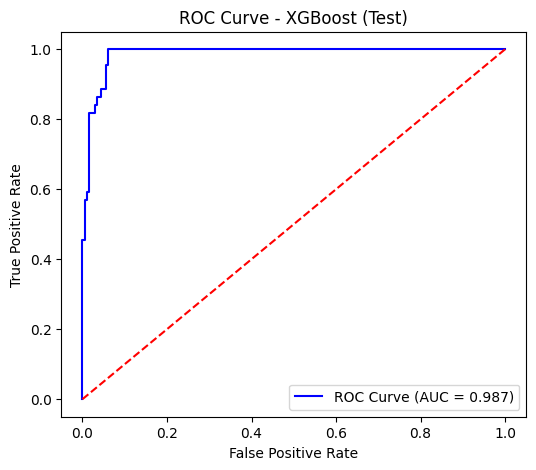

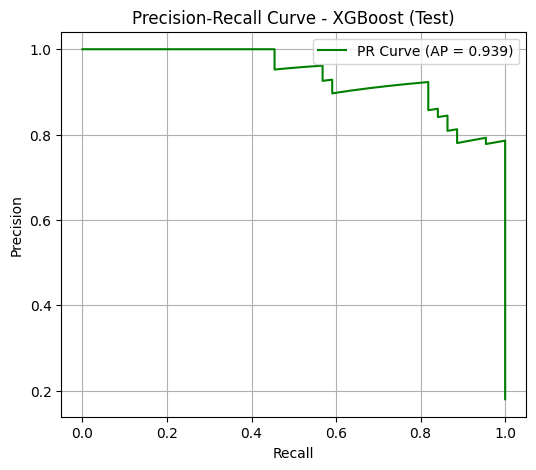


✅ Hasil evaluasi XGBoost disimpan di /content/drive/MyDrive/ComBio/Result/XGBoost/


In [10]:
evaluator.evaluate("XGBoost")

## Gradient Boosting


=== Training Set ===

📊 Training Evaluation Results :


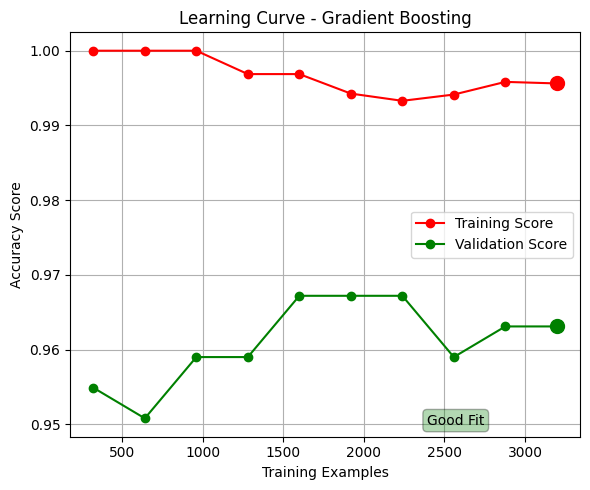

  - Final Training Score: 0.996
  - Final Validation Score: 0.963
  - Gap Training and Validation: 0.033
  - Model Assessment: Good Fit

=== Validation Set ===

📊 Validation Evaluation Results :
Accuracy (Validation): 0.963
F1-Score (Validation): 0.963
AUC (Validation): 0.994
AP (Validation): 0.977

📄 Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       200
           1       0.91      0.89      0.90        44

    accuracy                           0.96       244
   macro avg       0.94      0.93      0.94       244
weighted avg       0.96      0.96      0.96       244



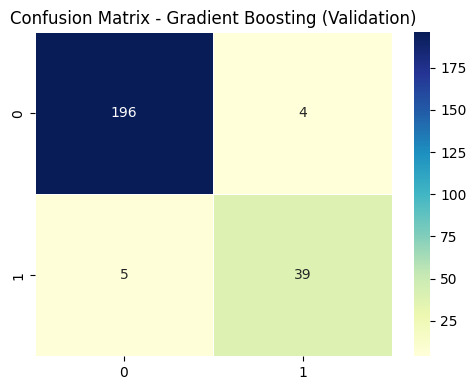

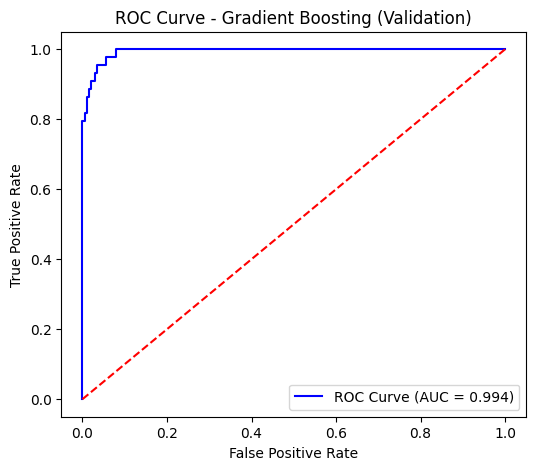

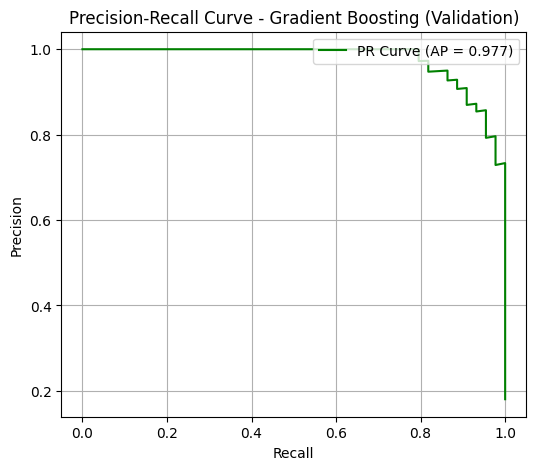


=== Test Set ===

📊 Test Evaluation Results :
Accuracy (Test): 0.951
F1-Score (Test): 0.952
AUC (Test): 0.988
AP (Test): 0.938

📄 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       201
           1       0.83      0.91      0.87        44

    accuracy                           0.95       245
   macro avg       0.91      0.93      0.92       245
weighted avg       0.95      0.95      0.95       245



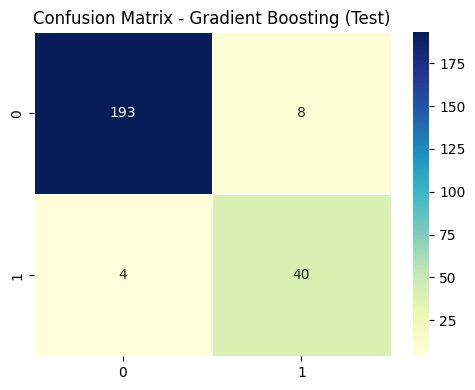

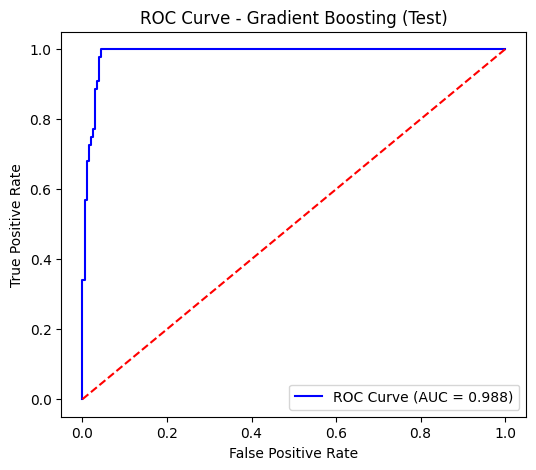

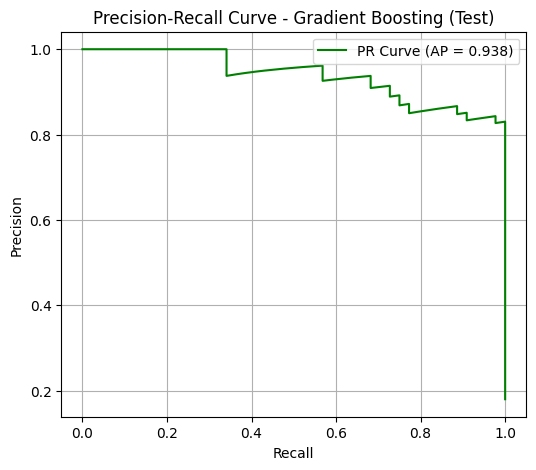


✅ Hasil evaluasi Gradient Boosting disimpan di /content/drive/MyDrive/ComBio/Result/Gradient Boosting/


In [11]:
evaluator.evaluate("Gradient Boosting")

## CatBoost


=== Training Set ===

📊 Training Evaluation Results :


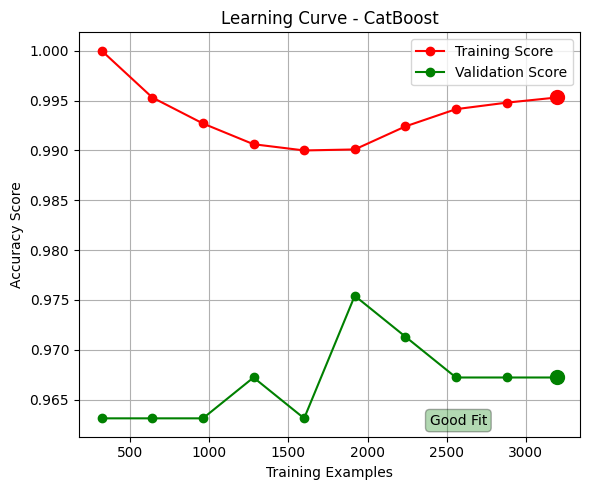

  - Final Training Score: 0.995
  - Final Validation Score: 0.967
  - Gap Training and Validation: 0.028
  - Model Assessment: Good Fit

=== Validation Set ===

📊 Validation Evaluation Results :
Accuracy (Validation): 0.967
F1-Score (Validation): 0.967
AUC (Validation): 0.994
AP (Validation): 0.975

📄 Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       200
           1       0.91      0.91      0.91        44

    accuracy                           0.97       244
   macro avg       0.94      0.94      0.94       244
weighted avg       0.97      0.97      0.97       244



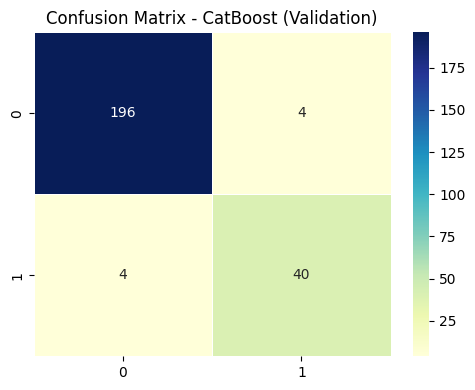

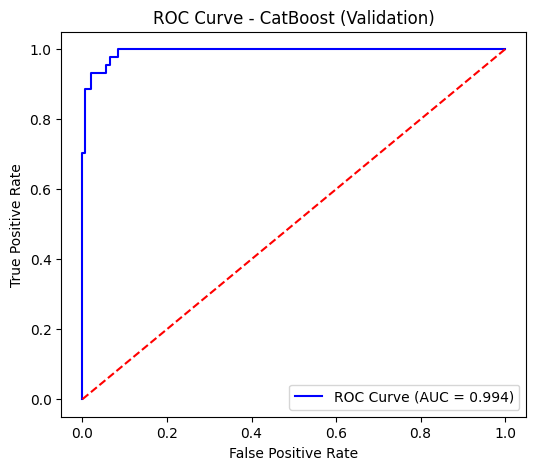

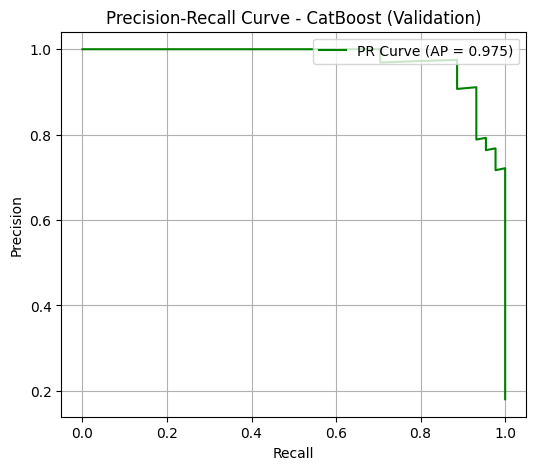


=== Test Set ===

📊 Test Evaluation Results :
Accuracy (Test): 0.959
F1-Score (Test): 0.96
AUC (Test): 0.99
AP (Test): 0.95

📄 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       201
           1       0.83      0.98      0.90        44

    accuracy                           0.96       245
   macro avg       0.91      0.97      0.94       245
weighted avg       0.96      0.96      0.96       245



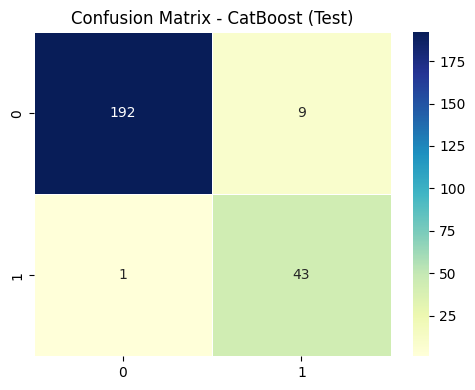

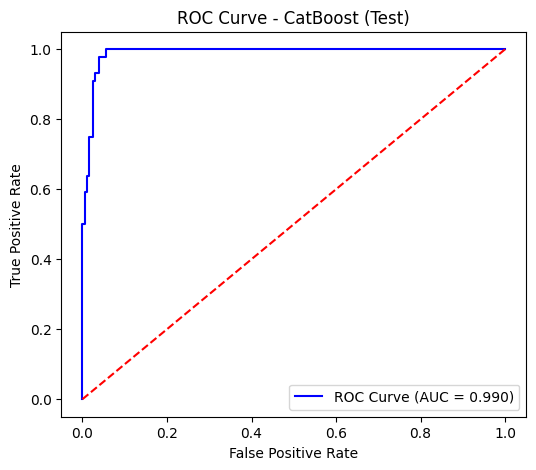

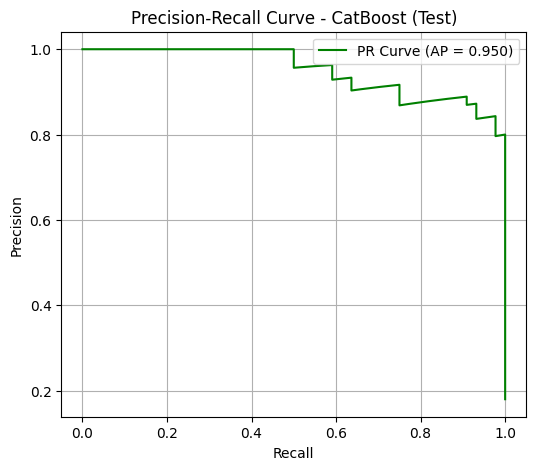


✅ Hasil evaluasi CatBoost disimpan di /content/drive/MyDrive/ComBio/Result/CatBoost/


In [12]:
evaluator.evaluate("CatBoost")

## Compare All Model

In [17]:
model_names = ["Random Forest", "Decision Tree", "XGBoost", "Gradient Boosting", "CatBoost"]

evaluation_data = {
    "Accuracy (Training)": [],
    "Accuracy (Validation)": [],
    "Accuracy (Test)": [],
    "F1-Score (Validation)": [],
    "AUC (Validation)": [],
    "AP (Validation)": [],
    "F1-Score (Test)": [],
    "AUC (Test)": [],
    "AP (Test)": []
}

for model_name in model_names:
    json_path = os.path.join(result_path, model_name, f"{model_name}_evaluation.json")

    if os.path.exists(json_path):
        with open(json_path, "r") as file:
            eval_result = json.load(file)

        evaluation_data["Accuracy (Training)"].append(eval_result["Accuracy (Training)"])
        evaluation_data["Accuracy (Validation)"].append(eval_result["Accuracy (Validation)"])
        evaluation_data["Accuracy (Test)"].append(eval_result["Accuracy (Test)"])
        evaluation_data["F1-Score (Validation)"].append(eval_result["F1-Score (Validation)"])
        evaluation_data["AUC (Validation)"].append(eval_result["AUC (Validation)"])
        evaluation_data["F1-Score (Test)"].append(eval_result["F1-Score (Test)"])
        evaluation_data["AUC (Test)"].append(eval_result["AUC (Test)"])
        evaluation_data["AP (Validation)"].append(eval_result["AP (Validation)"])
        evaluation_data["AP (Test)"].append(eval_result["AP (Test)"])

df = pd.DataFrame(evaluation_data, index=model_names)

df["Final Score"] = df[[
    "F1-Score (Validation)",
    "AUC (Validation)",
    "AP (Validation)",
    "F1-Score (Test)",
    "AUC (Test)",
    "AP (Test)"
]].mean(axis=1)

df_sorted = df.sort_values(by="Final Score", ascending=False)
display(HTML(df_sorted.to_html()))

,Accuracy (Training),Accuracy (Validation),Accuracy (Test),F1-Score (Validation),AUC (Validation),AP (Validation),F1-Score (Test),AUC (Test),AP (Test),Final Score
CatBoost,0.995,0.967,0.959,0.967,0.994,0.975,0.960,0.990,0.950,0.972667
Gradient Boosting,0.996,0.963,0.951,0.963,0.994,0.977,0.952,0.988,0.938,0.968667
XGBoost,0.987,0.963,0.943,0.963,0.994,0.972,0.945,0.987,0.939,0.966667
Random Forest,0.973,0.947,0.943,0.947,0.991,0.963,0.944,0.981,0.908,0.955667
Decision Tree,0.923,0.926,0.906,0.927,0.964,0.797,0.909,0.922,0.709,0.871333


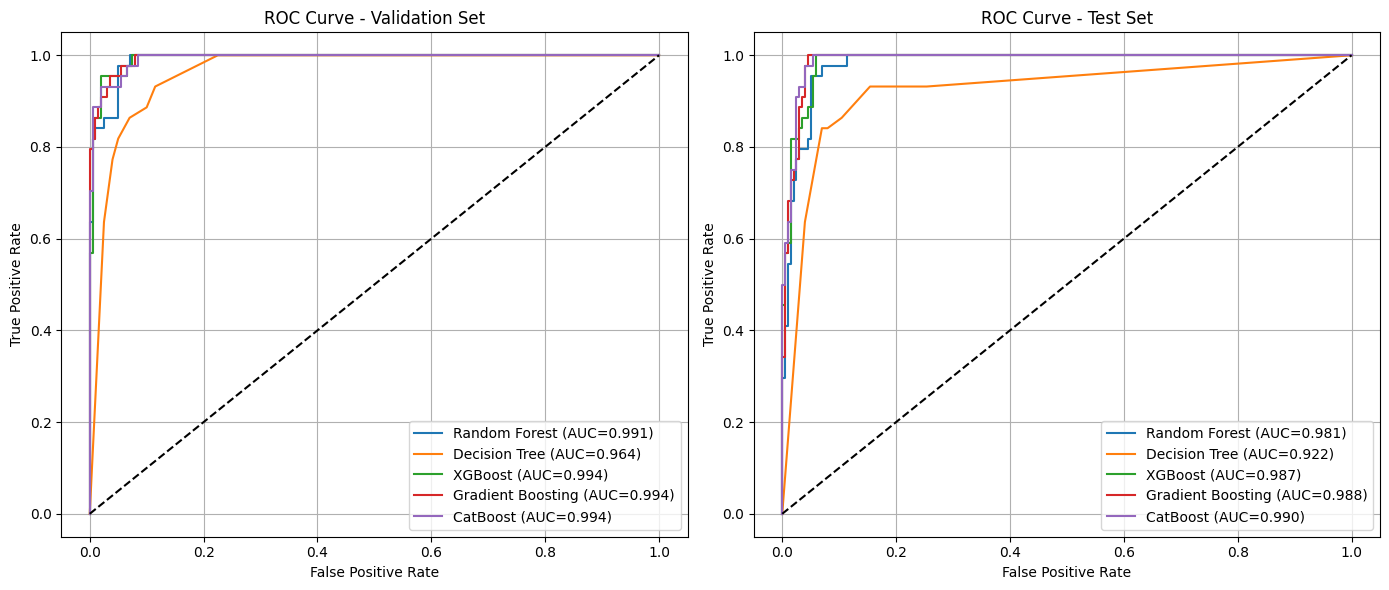

In [14]:
evaluator.plot_roc_side_by_side()

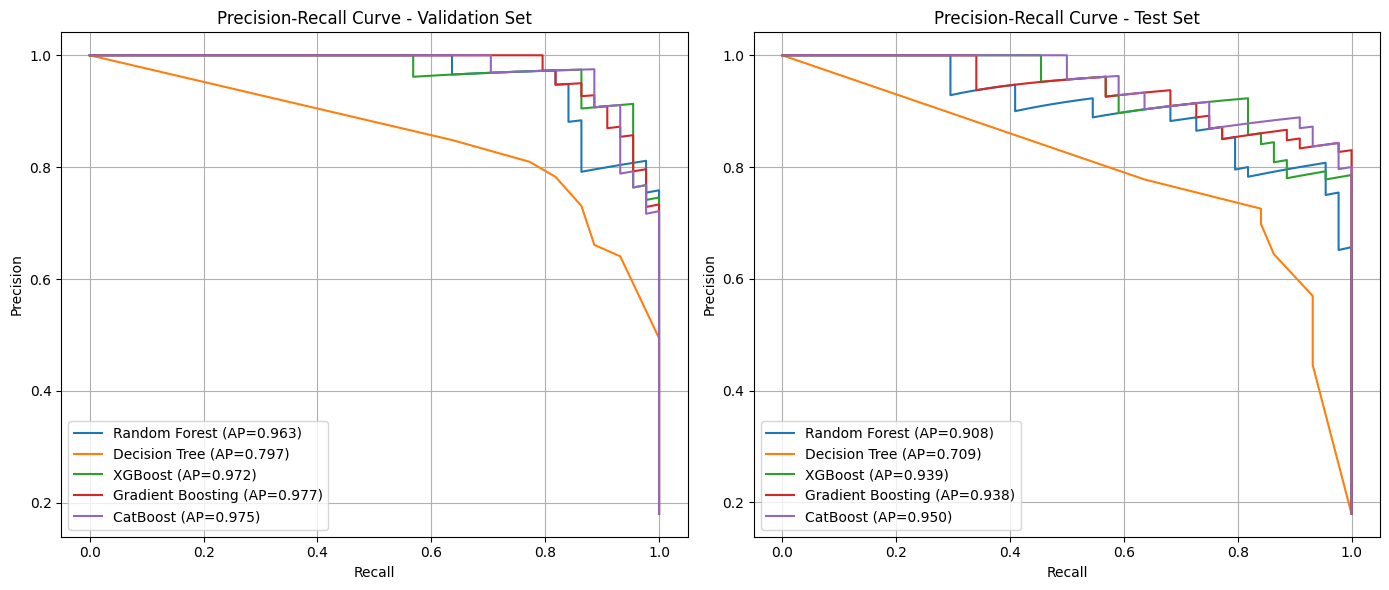

In [15]:
evaluator.plot_pr_side_by_side()